# Project: Supervised machine learning : Classification
## Classification Dataset

# Objective of this machine learning classification projects:
### The main objective of this classification project is to fitting different machine learning classification models to evalaute the performance of the models in classifying the breast cancer dataset from UCI Machine Learning  Repository

### Breast cancer dataset: This dataset consists of information about breast cancer tumors, including features such as size and shape, and labels indicating whether the tumor is benign or malignant. It is often used to train models that predict the likelihood of a tumor being malignant.

# Description of the Data
### Features: The dataset includes 10 features that describe the characteristics of the breast cancer tumors, such as radius, texture, perimeter, and area. These features are computed from a digitized image of the breast mass, and are all numeric values.

### Labels: The dataset includes a label for each data point, indicating whether the tumor is benign (labeled as "B") or malignant (labeled as "M").

### Number of data points: The breast cancer dataset includes 569 data points.

### Source: The breast cancer dataset was created by Dr. William H. Wolberg, a physician at the University of Wisconsin Hospitals, and was donated to the UCI Machine Learning Repository.

### Reference: For more information about the breast cancer dataset, see the UCI Machine Learning Repository page for the dataset (https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28diagnostic%29).

In [50]:
## loading the libraries
from sklearn import svm
from sklearn.model_selection import train_test_split

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

### Load the dataset and split it into training and test sets

In [52]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data['data']
y = data['target']

In [65]:
dX=pd.DataFrame(X)
dy=pd.DataFrame(y)
df=pd.concat([dX,dy],axis=1)

In [74]:
feature_names=np.array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error',
        'fractal dimension error', 'worst radius', 'worst texture',
        'worst perimeter', 'worst area', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst concave points',
        'worst symmetry', 'worst fractal dimension','target'])

In [76]:
df.columns=feature_names

In [79]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [80]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


<AxesSubplot:>

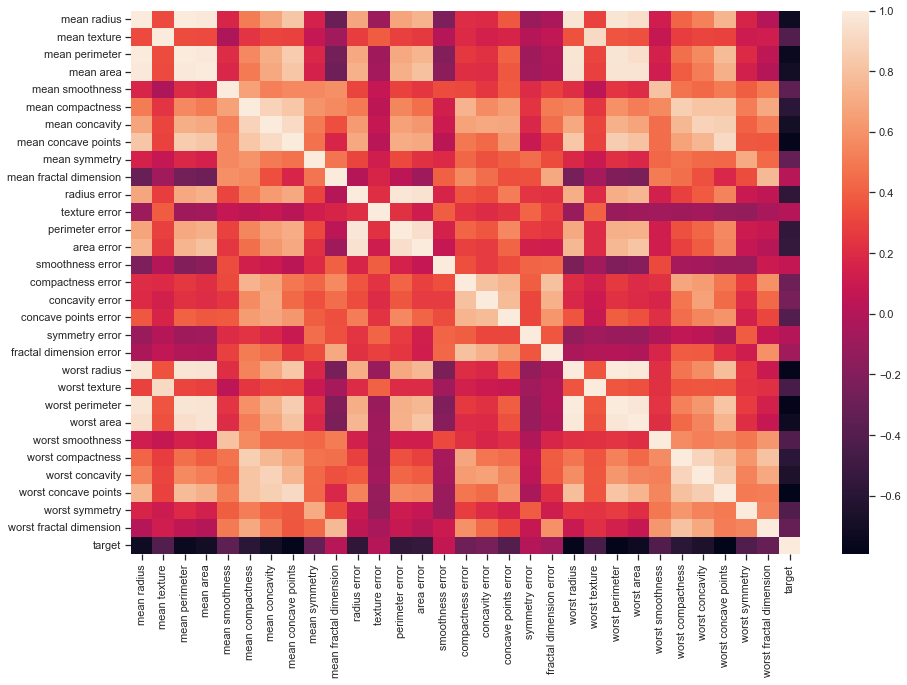

In [78]:
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(df.corr())

### Divide the data into training and test sets
### Use the training set to train the machine learning model
### Use the test data set to test the model performance

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Create the SVM classifier and train it on the training data

In [10]:
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)

SVC()

### Make predictions on the test set and calculate evaluation metrics

### Import libraries for evaluation metrics

In [24]:
from sklearn.metrics import classification_report

In [20]:
## prediction for the test set
y_pred = svm_model.predict(X_test)

### Print the classification report

In [26]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91        61
           1       0.98      0.91      0.94       110

    accuracy                           0.93       171
   macro avg       0.92      0.94      0.93       171
weighted avg       0.94      0.93      0.93       171



In [32]:
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score

### Print the accuracy of the classification, Precision of the model classification, and the F1 Score

In [34]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision=precision_score(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Recall: ", recall)
print("F1 score: ", f1)
print("Precision: ",precision)

Accuracy:  0.9298245614035088
Recall:  0.9803921568627451
F1 score:  0.9433962264150944
Precision:  0.9090909090909091


### Accuracy: 0.9298245614035088
### Recall: 0.9803921568627451
### F1 score: 0.9433962264150944
### Precision : 0.9090909090909091

### We can interpret these results as follows:

### The model has an accuracy of 92.98%, which means that it correctly predicts the class for 92.98% of the data points.
### The model has a recall of 98.04%, which means that it correctly predicts 98.04% of the positive examples.
### The model has an F1 score of 94.34%, which is a combination of its precision (90.91%) and recall (98.04%). A high F1 score indicates that the model has good precision and recall.
### The model has a precision of 90.91%, which means that 90.91% of the positive predictions made by the model are actually positive.

### Overall, these evaluation metrics suggest that the model is performing well, with high accuracy, recall, and F1 score. However, it is important to keep in mind that the interpretation of these metrics will depend on the specific task and the goals of the model. For example, in some situations, a higher recall may be more important than a higher precision, while in other situations the opposite may be true. It may be helpful to compare the performance of the model on different metrics to see which one best reflects the goals of the model.

# Logistic Regression Model

### Import libraries

In [38]:
from sklearn.linear_model import LogisticRegression

### Create the logistic regression model and train it on the training data

In [40]:
lr_model=LogisticRegression()
lr_model.fit(X_train, y_train)

C:\Users\mdsak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Make predictions on the test set and calculate evaluation metrics

In [41]:
y_pred=lr_model.predict(X_test)

### Print the accuracy of the classification, Precision of the model classification, and the F1 Score

In [43]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision=precision_score(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Recall: ", recall)
print("F1 score: ", f1)
print("Precision: ",precision)

Accuracy:  0.9590643274853801
Recall:  0.9607843137254902
F1 score:  0.9655172413793103
Precision:  0.9702970297029703


### The model has an accuracy of 95.91%, which means that it is making correct predictions for 95.91% of the data points.
### The model has a recall of 96.08%, which means that it is correctly predicting 96.08% of the positive examples.
### The model has an F1 score of 96.55%, which is a combination of its precision (97.03%) and recall (96.08%). A high F1 score indicates that the model has good precision and recall.
### The model has a precision of 97.03%, which means that 97.03% of the positive predictions made by the model are actually positive.
### Overall, these evaluation metrics suggest that the model is performing well on the classification task, with high accuracy, recall, and F1 score.

### Print the classification report for the Logistics Regression

In [44]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        70
           1       0.96      0.97      0.97       101

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



# Random Forest Classifier

In [45]:
### Importing libraries 
from sklearn.ensemble import RandomForestClassifier

### Create the random forest model and train it on the training data

In [46]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestClassifier()

### Make predictions on the test set and calculate evaluation metrics

In [48]:
y_pred = rf_model.predict(X_test)

### Print the accuracy of the classification, Precision of the model classification, and the F1 Score

In [49]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision=precision_score(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Recall: ", recall)
print("F1 score: ", f1)
print("Precision: ",precision)

Accuracy:  0.9707602339181286
Recall:  0.9705882352941176
F1 score:  0.9753694581280787
Precision:  0.9801980198019802


### The model has an accuracy of 97.08%, which means that it is making correct predictions for 97.08% of the data points.
### The model has a recall of 97.06%, which means that it is correctly predicting 97.06% of the positive examples.
### The model has an F1 score of 97.54%, which is a combination of its precision (98.02%) and recall (97.06%). A high F1 score indicates that the model has good precision and recall.
### The model has a precision of 98.02%, which means that 98.02% of the positive predictions made by the model are actually positive.
### Overall, these evaluation metrics suggest that the model is performing well on the classification task, with high accuracy, recall, and F1 score.

### Among the above three machine learning classification models the random forest classifier is performed best based on the performance accuracy of all the models on the breast cancer dataset.